# CSE 5243 - Introduction to Data Mining
## Homework 2: Classification
- Semester: Autumn 2020
- Instructor: Tom Bihari
- Section: Tuesday/Thursday 9:35AM
- Student Name: Bianca Dizon
- Student Email: baker.12345@osu.edu
- Student ID: 500126259

Template Version V1.
***

**Instructions and Helpful Hints:**
- Consider putting all of your "discussion" text in markdown cells, not inline with code. That gives you more control over formatting. Markdown cheat sheet: https://www.markdownguide.org/cheat-sheet
- Explain what you are doing, and why.  Explain what you found out or learned.
- *Make sure you run your entire workbook before handing it in, so the output cells are populated.*
- Follow the Section structure as much as possible - put your content where it is requested, so we can find your answers.
- If you have questions on expectations or need clarification or guidance, please ask.  Post to Piazza if it is a general question, so everyone benefits.

***
# Section: Overview
- Insert a short description of the scope of this exercise, any supporting information, etc.
***

***
# Section: Setup
- Add any needed imports, helper functions, etc., here.
***

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats

***
# Section: 1 - Evaluation mMethod
- Define measures for evaluating the classification models you develop.  Explain why the measures you choose provide a useful view into the value and usefulness of the model you eventually chose for the company to use.  Define two types:
***

***
## Section: 1.1 - Define measures that do not include the cost information
- (e.g., confusion matrices, accuracy, precision, recall, F-measures, etc.).
***

- A confusion matrix is a sepcific table layout that allows for the visualization of the performance of an algorithm. Each row represents the instances of the predicted class, and each column represents the intances in of the actual class. This matrix will be useful in comparing the performance of the different classification models against KNN. It will help show which models did the best in correctly classifying the pet owners. 
- Classification accuracy is the ratio of the number of correct predictions to the total number of input samples. This works well wehn there are equal number of samples from each class. We can find how accurate our classficiation models are using this metric.
- Precision is the proportion of positive identifications that are correct. recall is the proportion of actual positives was identified correctly. We can evaluate the effectiveness of a model examing both of these measures.
- F-measure measures a model's accuracy from the precision and recall of the test. A f-measure of 1 indicates perfect precision and recall and the value 0 is if either precision or recall is zero. This is a useful measure in evaluating the effectiveness of a model.

***
## Section: 1.2 - Define measures that do include the cost information
- (e.g., using cost matrices).
***

- Cost matrices calculate the cost of the wrong prediciton or right prediction. This is important in evaluating which classfication models will be best suited for our goal. We will need to keep which wrong predicitons cost more in mind when deciding between models to find the best one.

***
# Section: 2 - Pre-Processing of the Dataset
- Use the Adult dataset.  Split it into a Training dataset and a Test dataset based on the Train attribute (see the README worksheet in the data file).  Keep them separate and use the Training dataset for training/tuning and the Test dataset for testing.
***

In [2]:
#Reads from the data file which I put in a subfolder named Data
df = pd.read_excel('TEB SPSS Export ADULT for HW2 V2.xlsx', sheet_name = 'Data')

#Prints out the first few rows
df.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,GENERAL HEALTH CONDITION,SPOUSE LIVING IN SAME HOUSEHOLD,EDUCATIONAL ATTAINMENT,HOUSEHOLD TOTAL ANNUAL INC (PUF RECODE),"LIVE IN HOUSE, DUPLEX, BUILDING WITH 3+ UNITS, OR MOBILE HOME",# OF ROOMS IN HOME,OWN OR RENT HOME,...,RACE-CENSUS 2000 DEFINITION,MAIN OCCUPATION - 2003 RECODE,AGE (PUF RECODE),GENDER,SELF-REPORTED HOUSE TENURE,NUMBER OF MONTHS LIVED AT CURRENT ADDRESS,WGHT - POUNDS (PUF RECODE),ANY WALKING FOR TRANSPORT OR FUN/EXERCISE,EMPLOYMENT STATUS,YEARS LIVED IN THE US
0,NaN,NaN,NaN,AB1,AH44,AHEDUC,AK22_P,AK23,AK24,AK25,...,RACECEN,OCCMAIN,SRAGE_P,SRSEX,SRTENR,TIMEAD,WGHTP_P,WLKANY,WRKST,YRUS
1,RecID,Train,Class,Health,Spouse,Education,Income,Home Type,Number of Rooms,Own or Rent,...,Race,Occupation,Age,Gender,House Tenure,Months at Current Address,Weight,Walking,Employment Status,Years in USA
2,1,y,c,1,1,4,50000,1,6,1,...,5,-1,35,2,1,48,220,1,5,-1
3,2,y,d,2,-1,4,13200,3,3,2,...,5,-1,81,2,2,60,140,1,5,-1
4,3,y,n,2,1,3,12000,1,3,2,...,2,-1,22,2,2,36,120,2,5,-1


In [3]:
#Splits the data into the training set and the data set
train = df.loc[df['Unnamed: 1'] == 'y']
test = df.loc[df['Unnamed: 1'] == 'n']
# print(train)
# print("########")
# print(test)

***
## Section: 2.1 - Explore the attributes
- As in Homework 1, explore the attributes briefly. Reference the provided Data Dictionary (CHIS 2003 PUF Data Dictionary-Adult May2010.pdf).
- Provide basic statistics for the attributes.
- List which attributes are Nominal (even though they are encoded as numbers), Ordinal, Interval, Ratio.
***

I will be exploring some of the attributes' basic statisctics below briefly in the section below. I will choose attributes that I feel are relevant to the classification problem of classifying which people have dogs, cats, both, or neither.

- Nominal attributes: GENERAL HEALTH CONDITION, SPOUSE LIVING IN SAME HOUSEHOLD, LIVE IN HOUSE, DUPLEX, BUILDING WITH 3+ UNITS, OR MOBILE HOME, OWN OR RENT HOME, RACE-CENSUS 2000 DEFINITION, GENDER, EMPLOYMENT STATUS
- Ordinal attributes: EDUCATIONAL ATTAINMENT, HOUSEHOLD TOTAL ANNUAL INC (PUF RECODE), # OF ROOMS IN HOME, AGE (PUF RECODE), SELF-REPORTED HOUSE TENURE, NUMBER OF MONTHS LIVED AT CURRENT ADDRESS, ANY WALKING FOR TRANSPORT OR FUN/EXERCISE, YEARS LIVED IN THE US
- Interval attributes: 
- Ration attributes: WGHT - POUNDS (PUF RECODE)

In [4]:
# Check the data types
print(df.dtypes)

Unnamed: 0                                                       object
Unnamed: 1                                                       object
Unnamed: 2                                                       object
GENERAL HEALTH CONDITION                                         object
SPOUSE LIVING IN SAME HOUSEHOLD                                  object
EDUCATIONAL ATTAINMENT                                           object
HOUSEHOLD TOTAL ANNUAL INC (PUF RECODE)                          object
LIVE IN HOUSE, DUPLEX, BUILDING WITH 3+ UNITS, OR MOBILE HOME    object
# OF ROOMS IN HOME                                               object
OWN OR RENT HOME                                                 object
MONTHLY RENT/SPACE PAYMENT (PUF RECODE)                          object
MONTHLY MORTGAGE PAYMENT (PUF RECODE)                            object
CITIZENSHIP STATUS (3 LVLS)                                      object
COUNTRY BORN IN                                                 

In [5]:
# Delete first two rows of df
df = df[2:]
# print(df)

# Convert first two columns into string
df['Unnamed: 1'] = df['Unnamed: 1'].astype('string')
df['Unnamed: 2'] = df['Unnamed: 2'].astype('string')
# Convert attribute object values into float values
df[['GENERAL HEALTH CONDITION', 'SPOUSE LIVING IN SAME HOUSEHOLD', 'EDUCATIONAL ATTAINMENT', 'HOUSEHOLD TOTAL ANNUAL INC (PUF RECODE)']] = df[['GENERAL HEALTH CONDITION', 'SPOUSE LIVING IN SAME HOUSEHOLD', 'EDUCATIONAL ATTAINMENT', 'HOUSEHOLD TOTAL ANNUAL INC (PUF RECODE)']].apply(pd.to_numeric)
df[['LIVE IN HOUSE, DUPLEX, BUILDING WITH 3+ UNITS, OR MOBILE HOME', 'OWN OR RENT HOME', 'WORKING STATUS', 'FAMILY TYPE (4 LVLS)', 'AGE (PUF RECODE)']] = df[['LIVE IN HOUSE, DUPLEX, BUILDING WITH 3+ UNITS, OR MOBILE HOME', 'OWN OR RENT HOME', 'WORKING STATUS', 'FAMILY TYPE (4 LVLS)', 'AGE (PUF RECODE)']].apply(pd.to_numeric)
df[['GENDER', 'NUMBER OF MONTHS LIVED AT CURRENT ADDRESS', 'WGHT - POUNDS (PUF RECODE)', 'ANY WALKING FOR TRANSPORT OR FUN/EXERCISE', 'EMPLOYMENT STATUS']] = df[['GENDER', 'NUMBER OF MONTHS LIVED AT CURRENT ADDRESS', 'WGHT - POUNDS (PUF RECODE)', 'ANY WALKING FOR TRANSPORT OR FUN/EXERCISE', 'EMPLOYMENT STATUS']].apply(pd.to_numeric)
# df[['Unnamed: 0', 'MONTHLY RENT/SPACE PAYMENT (PUF RECODE)', 'MONTHLY MORTGAGE PAYMENT (PUF RECODE)', 'CITIZENSHIP STATUS (3 LVLS)', 'COUNTRY BORN IN', 'HEIGHT - INCHES (PUF RECODE)', 'MARITAL STATUS', 'RACE-CENSUS 2000 DEFINITION', 'MAIN OCCUPATION - 2003 RECODE', 'SELF-REPORTED HOUSE TENURE', 'YEARS LIVED IN THE US']] = df.[['Unnamed: 0', 'MONTHLY RENT/SPACE PAYMENT (PUF RECODE)', 'MONTHLY MORTGAGE PAYMENT (PUF RECODE)', 'CITIZENSHIP STATUS (3 LVLS)', 'COUNTRY BORN IN', 'HEIGHT - INCHES (PUF RECODE)', 'MARITAL STATUS', 'RACE-CENSUS 2000 DEFINITION', 'MAIN OCCUPATION - 2003 RECODE', 'SELF-REPORTED HOUSE TENURE', 'YEARS LIVED IN THE US']].apply(pd.to_numeric)
print(df.dtypes)
print(df)

Unnamed: 0                                                       object
Unnamed: 1                                                       string
Unnamed: 2                                                       string
GENERAL HEALTH CONDITION                                          int64
SPOUSE LIVING IN SAME HOUSEHOLD                                   int64
EDUCATIONAL ATTAINMENT                                            int64
HOUSEHOLD TOTAL ANNUAL INC (PUF RECODE)                           int64
LIVE IN HOUSE, DUPLEX, BUILDING WITH 3+ UNITS, OR MOBILE HOME     int64
# OF ROOMS IN HOME                                               object
OWN OR RENT HOME                                                  int64
MONTHLY RENT/SPACE PAYMENT (PUF RECODE)                          object
MONTHLY MORTGAGE PAYMENT (PUF RECODE)                            object
CITIZENSHIP STATUS (3 LVLS)                                      object
COUNTRY BORN IN                                                 

In [6]:
# Basic statistics for all attributes
print(df.describe(include='all'))

        Unnamed: 0 Unnamed: 1 Unnamed: 2  GENERAL HEALTH CONDITION  \
count      42044.0      42044      42044              42044.000000   
unique     42044.0          2          4                       NaN   
top        42044.0          y          n                       NaN   
freq           1.0      28029      23722                       NaN   
mean           NaN        NaN        NaN                  2.490914   
std            NaN        NaN        NaN                  1.130577   
min            NaN        NaN        NaN                  1.000000   
25%            NaN        NaN        NaN                  2.000000   
50%            NaN        NaN        NaN                  2.000000   
75%            NaN        NaN        NaN                  3.000000   
max            NaN        NaN        NaN                  5.000000   

        SPOUSE LIVING IN SAME HOUSEHOLD  EDUCATIONAL ATTAINMENT  \
count                      42044.000000            42044.000000   
unique                   

***
## Section: 2.2 - Revise the dataset
- Review the meanings of the attributes and consider removing redundant or (likely) irrelevant attributes, combining attributes, etc., to reduce the number of attributes.
- (You may choose to use techniques such as those you used in Homework 1 to analyze the impacts of individual attributes on the CLASS attribute, but you need not do a “deep” analysis.)
- Describe what you chose to do (and not do), and why.
***

- I chose to remove the following attributes due to either redundancy or irrelevances: 'Unnamed: 0', 'MONTHLY RENT/SPACE PAYMENT (PUF RECODE)', 'MONTHLY MORTGAGE PAYMENT (PUF RECODE)', 'CITIZENSHIP STATUS (3 LVLS)', 'COUNTRY BORN IN', 'HEIGHT - INCHES (PUF RECODE)', 'MARITAL STATUS', 'RACE-CENSUS 2000 DEFINITION', 'MAIN OCCUPATION - 2003 RECODE', 'SELF-REPORTED HOUSE TENURE', 'YEARS LIVED IN THE US.
- I chose to use the Pearson correlation to find correlation between the attributes chosen. I chose this measure to analyze the correlation between the Class and the different attributes to get a sense of what the relationships between the Class an attributes might be. 
- I chose to change the Class values from nominal to ordinal. I changed the values of n, d, c, and b to, respectively, 1, 2, 3, and 4. I changed the values from nominal to ordinal to be able to look at correlation between the Class and attributes.

In [7]:
# Remove redundant or irrelevant attributes
df = df.drop(columns = ['Unnamed: 0', 'MONTHLY RENT/SPACE PAYMENT (PUF RECODE)', 'MONTHLY MORTGAGE PAYMENT (PUF RECODE)', 'CITIZENSHIP STATUS (3 LVLS)', 'COUNTRY BORN IN', 'HEIGHT - INCHES (PUF RECODE)', 'MARITAL STATUS', 'RACE-CENSUS 2000 DEFINITION', 'MAIN OCCUPATION - 2003 RECODE', 'SELF-REPORTED HOUSE TENURE', 'YEARS LIVED IN THE US'])
print(df)

      Unnamed: 1 Unnamed: 2  GENERAL HEALTH CONDITION  \
2              y          c                         1   
3              y          d                         2   
4              y          n                         2   
5              y          c                         1   
6              y          d                         1   
...          ...        ...                       ...   
42041          n          d                         1   
42042          n          n                         2   
42043          n          n                         3   
42044          n          d                         3   
42045          n          n                         3   

       SPOUSE LIVING IN SAME HOUSEHOLD  EDUCATIONAL ATTAINMENT  \
2                                    1                       4   
3                                   -1                       4   
4                                    1                       3   
5                                   -1             

In [8]:
# convert class data into numerical data
df['Unnamed: 2'].replace(to_replace='n', value=1, inplace=True)
df['Unnamed: 2'].replace(to_replace='d', value=2, inplace=True)
df['Unnamed: 2'].replace(to_replace='c', value=3, inplace=True)
df['Unnamed: 2'].replace(to_replace='b', value=4, inplace=True)

# Find the Pearson correlations between CLASS and all attributes 
print(df.corr(method='pearson'))

                                                    Unnamed: 2  \
Unnamed: 2                                            1.000000   
GENERAL HEALTH CONDITION                             -0.092975   
SPOUSE LIVING IN SAME HOUSEHOLD                       0.037301   
EDUCATIONAL ATTAINMENT                               -0.013974   
HOUSEHOLD TOTAL ANNUAL INC (PUF RECODE)               0.127607   
LIVE IN HOUSE, DUPLEX, BUILDING WITH 3+ UNITS, ...   -0.151969   
OWN OR RENT HOME                                     -0.136469   
WORKING STATUS                                       -0.080543   
FAMILY TYPE (4 LVLS)                                  0.014392   
AGE (PUF RECODE)                                     -0.016478   
GENDER                                                0.049685   
NUMBER OF MONTHS LIVED AT CURRENT ADDRESS             0.019238   
WGHT - POUNDS (PUF RECODE)                            0.051368   
ANY WALKING FOR TRANSPORT OR FUN/EXERCISE            -0.005000   
EMPLOYMENT

***
## Section: 2.3 - Transform the attributes
- Consider transforming the remaining attributes (e.g., using the data dictionary to replace the numbers with text values for some attributes – this might or might not be useful), normalizing / scaling values, encoding labels (if necessary), etc.
- Describe what you chose to do (and not do), and why.
***

- I have chosen to transform all the attributes except Class (Unnamed: 2) to float values to use for calculations and statistics, as can be seen above. I changed the Class values from being nominal to ordinal to help with finding correlation between Class and my chosen attributes.

***
# Section: 3 - Evaluation of the Off-The-Shelf KNN Classifier
- Select the KNN classifier from the SciKit Learn library and run it on the dataset.
***

In [15]:
#import the KneighborsClassifier class from sklearn
from sklearn.neighbors import KNeighborsClassifier

#import metrics model to check the accuracy
from sklearn import metrics

In [16]:
# # Reclassify training and testing data because dataframe has been changed 
# #Splits the data into the training set and the data set
# train = df.loc[df['Unnamed: 1'] == 'y']
# test = df.loc[df['Unnamed: 1'] == 'n']
# # print(train.shape)
# # print(test.shape)

# #drop train column
# train = train.drop(columns = ['Unnamed: 1'])
# test = test.drop(columns = ['Unnamed: 1'])
                        
# #make shape of train and test data same
# train = train.drop(df.index[0:14012])
# # print(train.shape)

# #split datat into training and test sets (80:20 splits)
# from sklearn.model_selection import train_test_split
# x_train, x_test, y_train, y_test = train_test_split(train, test, test_size=0.2, random_state=4)
# print(x_train.shape)
# print(x_test.shape)
# print(y_train.shape)
# print(y_test.shape)
# print(train)

***
## Section: 3.1 - Configure the off-the-shelf KNN classifier
- Use the KNeighborsClassifier from the SciKit Learn library
- Explain all setup, parameters and execution options you chose to set, and why.
***

- I decided to split my train and test data further. I changed the value of K with each iteration of the program. I had a variable range for K to see how the value of K affects the accuracy of the model. I decided to measue the performance of the model with the measure of accuracy. I did this because I wanted to see how well my model classified the data into the classes.

In [11]:
# Reclassify training and testing data because dataframe has been changed 
#Splits the data into the training set and the data set
train = df.loc[df['Unnamed: 1'] == 'y']
test = df.loc[df['Unnamed: 1'] == 'n']
# print(train.shape)
# print(test.shape)

#drop train column
train = train.drop(columns = ['Unnamed: 1'])
test = test.drop(columns = ['Unnamed: 1'])
print(train.shape)

# split the x_train, y_train, x_test, y_test
df_traincopy1 = train.copy(deep=True)
df_testcopy1 = test.copy(deep=True)
x_train = df_traincopy1.drop(columns = ['Unnamed: 2'])
y_train = train[['Unnamed: 2']].copy()
print(y_train.shape)
print(x_train.shape)
x_test = df_testcopy1.drop(columns = ['Unnamed: 2'])
y_test = test[['Unnamed: 2']].copy()
print(y_test.shape)
print(x_test.shape)

(28029, 16)
(28029, 1)
(28029, 15)
(14015, 1)
(14015, 15)


In [12]:
#we'll run from k=1 to k=25 and record testing accuracy
k_range = range(1, 26)
scores= {}
scores_list = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train, y_train.values.ravel())
    y_pred=knn.predict(x_test)
    scores[k]=metrics.accuracy_score(y_test, y_pred)
    scores_list.append(metrics.accuracy_score(y_test, y_pred))

Text(0, 0.5, 'Testing Accuracy')

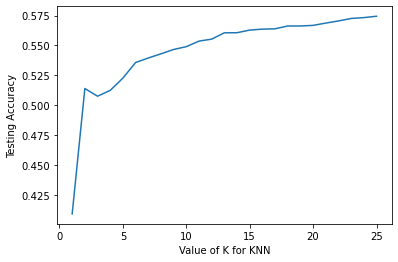

In [13]:
#plot the relationship between K and the testing accuracy
plt.plot(k_range, scores_list)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')

***
## Section: 3.2 - Run and evaluate the classifier
- Try several values of the K parameter and compare the results.
- Evaluate the performance of the classifier, using the evaluation method you defined above.
***

- As you can see below, I try multiple ranges of K in increasing order. As K increases in magnitude so does the testing accuracy. The resuting data shows that the larger the K value the more accurate my model is.

Text(0, 0.5, 'Testing Accuracy')

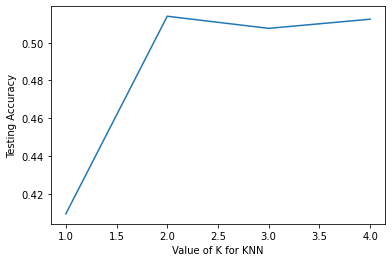

In [14]:
#we'll run from k=1 to k=5 and record testing accuracy
k_range = range(1, 5)
scores= {}
scores_list = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train, y_train.values.ravel())
    y_pred=knn.predict(x_test)
    scores[k]=metrics.accuracy_score(y_test, y_pred)
    scores_list.append(metrics.accuracy_score(y_test, y_pred))

#plot the relationship between K and the testing accuracy
plt.plot(k_range, scores_list)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')

Text(0, 0.5, 'Testing Accuracy')

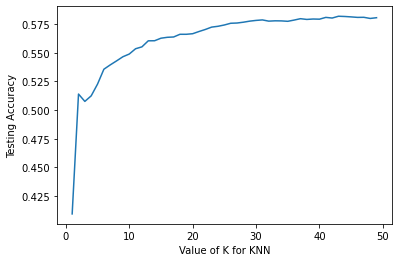

In [15]:
#we'll run from k=1 to k=50 and record testing accuracy
k_range = range(1, 50)
scores= {}
scores_list = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train, y_train.values.ravel())
    y_pred=knn.predict(x_test)
    scores[k]=metrics.accuracy_score(y_test, y_pred)
    scores_list.append(metrics.accuracy_score(y_test, y_pred))

#plot the relationship between K and the testing accuracy
plt.plot(k_range, scores_list)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')

Text(0, 0.5, 'Testing Accuracy')

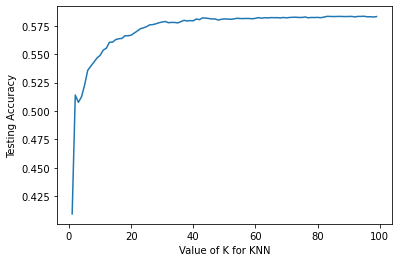

In [16]:
#we'll run from k=1 to k=100 and record testing accuracy
k_range = range(1, 100)
scores= {}
scores_list = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train, y_train.values.ravel())
    y_pred=knn.predict(x_test)
    scores[k]=metrics.accuracy_score(y_test, y_pred)
    scores_list.append(metrics.accuracy_score(y_test, y_pred))

#plot the relationship between K and the testing accuracy
plt.plot(k_range, scores_list)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')

***
## Section: 3.3 - Evaluate the choice of the KNN classifier
- What characteristics of the problem and data made KNN a good or bad choice?
***

- KNN is automatically no-linear and it can detect linear or non-linear distributed data. It tends to do well with a lot of data points. KNN is a good choice for this data set because there are a lot of data points and attributes to consider in the classification of the CLASS.
- A negative side to KNN is that it needs to be carefully tuned. The choice of K and the metric(distance) is important to get right. It is also sensitive to bad features or attributes. Feature selection is very important for this model. Outliers is also an important part. KNN is sensitive to outliers. KNN might be a bad choice for the current state of my data since I did not focus on lookining outliers and removing them from my data. Akso, I was not able to change my features to see which combos would yield the best accuracy using this KNN model.

***
# Section: 4 - Evaluation of Off-The-Shelf Classifier #2
- As with the KNN classifier above, choose another classifier from the SciKit Learn library (Decision Tree, SVM, Logistic Regression, etc.) and run it on the dataset.
***

***
## Section: 4.1 - Configure the classifier
- Use the appropriate classifier from the SciKit Learn library.
- Explain all setup, parameters and execution options you chose to set, and why.
***

- I chose Decision Tree for this round of classifier testing. I changed the criterion for the different evaluations of the classifier as well as different max_depths. I found that the gini criterion had better accuracy than the entropy criterion. Futhermore, I found that increasing the max_depth from 3 to 7 yielded slightly worse accuracy. I have found that the best max_depth parameters are between 3-6.

In [18]:
from sklearn.tree import DecisionTreeClassifier # import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics


***
## Section: 4.2 - Run and evaluate the classifier
- Try several values of the parameters (if appropriate) and compare the results.
- Evaluate the performance of the classifier, using the evaluation method you defined above.
***

In [19]:
#create object
clf = DecisionTreeClassifier()

#fit model to our data
clf = clf.fit(x_train, y_train)

# test the model with testing data
y_pred = clf.predict(x_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.4316089903674634


In [20]:
#create object
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)

#fit model to our data
clf = clf.fit(x_train, y_train)

# test the model with testing data
y_pred = clf.predict(x_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.5848019978594363


In [21]:
#create object
clf = DecisionTreeClassifier(criterion="entropy", max_depth=7)

#fit model to our data
clf = clf.fit(x_train, y_train)

# test the model with testing data
y_pred = clf.predict(x_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.5765251516232608


In [22]:
#create object
clf = DecisionTreeClassifier(criterion="gini", max_depth=3)

#fit model to our data
clf = clf.fit(x_train, y_train)

# test the model with testing data
y_pred = clf.predict(x_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.5848019978594363


In [23]:
#create object
clf = DecisionTreeClassifier(criterion="gini", max_depth=7)

#fit model to our data
clf = clf.fit(x_train, y_train)

# test the model with testing data
y_pred = clf.predict(x_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.5829468426685694


***
## Section: 4.3 - Evaluate the choice of the classifier
- What characteristics of the problem and data made the classifier a good or bad choice?
***

- Decision Tree is easy to understand and interpret and is great for visual representation. As can be seen from above, it is easy to see the difference in accuracy differences. Additionally, it can work with numerical and catergorical features, which is helpful with this set of data. I think Decision Tree is a good choice for this data set of the above reasons. The accuracy of the mdoels are very comparable to the KNN classifier.

***
# Section: 5 - Evaluation of Off-The-Shelf Classifier #3
- As with the KNN classifier above, choose another classifier from the SciKit Learn library (Decision Tree, SVM, Logistic Regression, etc.) and run it on the dataset.
***

***
## Section: 5.1 - Configure the classifier
- Use the appropriate classifier from the SciKit Learn library.
- Explain all setup, parameters and execution options you chose to set, and why.
***

In [12]:
from sklearn.svm import SVC
# from sklearn import svm
from sklearn import metrics

***
## Section: 5.2 - Run and evaluate the classifier
- Try several values of the parameters (if appropriate) and compare the results.
- Evaluate the performance of the classifier, using the evaluation method you defined above.
***

In [ ]:
svclassifier = SVC(kernel='linear')
svclassifier.fit(x_train, y_train.values.ravel())
y_pred = svclassifier.predict(x_test)
# #Create a svm Classifier
# clf = svm.SVC(kernel='linear') # Linear Kernel

# #Train the model using the training sets
# clf.fit(x_train, y_train)

# #Predict the response for test dataset
# y_pred = clf.predict(x_test)

print("Accuracy:",metrics(accuracy_score(y_test, y_pred)))

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

***
## Section: 5.3 - Evaluate the choice of the classifier
- What characteristics of the problem and data made the classifier a good or bad choice?
***

- SVM is a good choice because it can beused in linear or non-linear ways with the use of a Kernel. It is helpful when you have limited set of points in many dimensions SVM tends to be very good because it should be able to find the linear separation that exists.  Since we have a lot of points it is probably not the best classifier. It does not compare as well as the KNN and Decision Tree classifiers.

***
# Section: 6 - Comparison of the Three Classifiers
***

***
## Section: 6.1 - Compare the performance of these classifiers to each other
- What are their strong and weak points?Configure the classifier
***

- The KNN and Decision Tree classifiers were comparable in performance. The accuracy of both are nearly the same.

***
## Section: 6.2 - Choose a Best Classifier
- Choose one of the three classifiers as best and explain why.
***

- I believe KNN to be the best classfifier for this data set because it can detect linear or non-linear distributed data. The data set for this homework s very much non-linear. Also KNN tends to do well with a lot of data points. KNN is a good choice for this data set because there are a lot of data points and attributes to consider in the classification of the CLASS. The accuracy measure for KNN is comparable to the others and is easier to understand.

***
# Section: 7 - Conclusions
- Write a paragraph on what you discovered or learned from this homework.
***

- Overall I learned the differences between three classifiers, KNN, Decision Trees, and SVM. I learned that different measures of accuracy showed which classifiers are good.

***
### END-OF-SUBMISSION
***